# Experiment 2 - Principal Component Analysis

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
! pip install seaborn
import seaborn as sns
from sklearn.preprocessing import StandardScaler

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


Importing the Dataset

In [3]:
df_wine_red = pd.read_csv('winequality-red.csv', sep=';')
df_wine_white = pd.read_csv('winequality-white.csv', sep=';')

In [4]:
df_wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
df_wine_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Data Preprocessing for Red wine Quality

Scaling The Dataset

In [23]:
X = df_wine_red.drop(columns=['quality'])
y = df_wine_red.quality

In [11]:
Scaler = StandardScaler()
scaled_df_wine_red = pd.DataFrame(Scaler.fit_transform(df_wine_red), columns=df_wine_white.columns)

In [12]:
scaled_df_wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


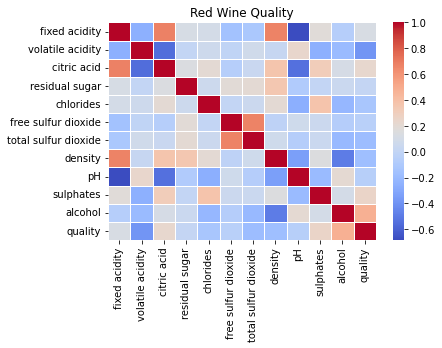

In [13]:
ax = sns.heatmap( scaled_df_wine_red.corr() , linewidth = 0.5 , cmap = 'coolwarm' )
plt.title( "Red Wine Quality" )
plt.show()

In [14]:
X = scaled_df_wine_red.drop(columns=['quality'])

In [28]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2','PCA3','PCA4','PCA5',])
             

In [34]:
print(list(pca.explained_variance_ratio_))

[0.28173931278817294, 0.17508269905476778, 0.14095849897952187, 0.11029386641621133, 0.08720837012236161]


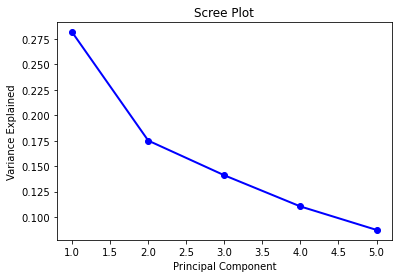

In [31]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

As shown in the graph the 1st 3 Principal Components holds around 60% of the variance in the Dataset.


In [43]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf = finalDf.drop(columns=['PCA4', 'PCA5'])
finalDf

,PCA1,PCA2,PCA3,quality
0,-1.619530,0.450950,-1.774454,5
1,-0.799170,1.856553,-0.911690,5
2,-0.748479,0.882039,-1.171394,5
3,2.357673,-0.269976,0.243489,6
4,-1.619530,0.450950,-1.774454,5
...,...,...,...,...
1594,-2.150500,0.814286,0.617063,5
1595,-2.214496,0.893101,1.807402,6
1596,-1.456129,0.311746,1.124239,6
1597,-2.270518,0.979791,0.627965,5


array([5, 6, 7, 4, 8, 3], dtype=int64)

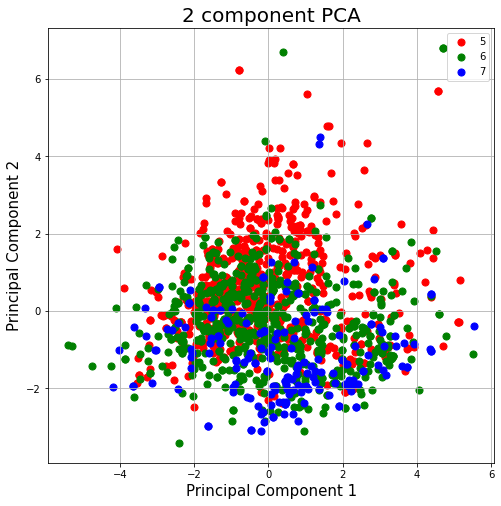

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [5, 6, 7, 4, 8, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


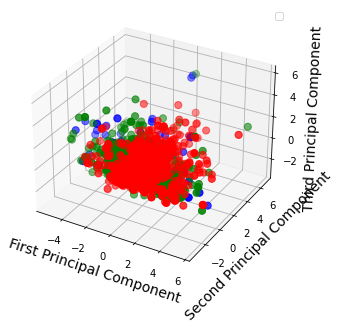

In [55]:
# ! pip install mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

targets = [5, 6, 7, 4, 8, 3]
colors = ['r', 'g', 'b']
fig.patch.set_facecolor('white')
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , finalDf.loc[indicesToKeep, 'PCA3']
               , c = color
               , s = 50)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

## Model Prediction 


In [62]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error 

#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
y = finalDf.quality
X = finalDf.drop(columns = ['quality'])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

# fit data
fit_rnd = rnd.fit(x_train,y_train)

# predicting score
rnd_score = rnd.score(x_test,y_test)
print('score of model is : ',rnd_score)

# display error rate
print('calculating the error')
y_predict = rnd.predict(x_test)

# calculating mean squared error
MSE = mean_squared_error(y_test,y_predict)

# calculating root mean squared error
rnd_RMSE = np.sqrt(MSE)

# display MSE
print('mean squared error is : ',rnd_MSE)

# display RMSE
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(y_predict,y_test))

score of model is :  0.721875
calculating the error
mean squared error is :  0.403125
root mean squared error is :  0.6373774391990981
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.85      0.78      0.81       147
           6       0.76      0.67      0.71       141
           7       0.50      0.66      0.57        32
           8       0.00      0.00      0.00         0

    accuracy                           0.72       320
   macro avg       0.35      0.35      0.35       320
weighted avg       0.77      0.72      0.74       320



C:\Users\Dexter\Anaconda3\envs\mp_project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dexter\Anaconda3\envs\mp_project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dexter\Anaconda3\envs\mp_project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Conclusion**: 
Understood the working of Principal Component Analysis, and how it reduced the number of attributes to reduce data and hold the variance for better results